0. Import all libraries

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings


1. Load heart disease dataset in pandas dataframe


In [2]:
#import dataset
df = pd.read_csv("C:\\basic_machine_learning_model\\heart failure disease dataset\\heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


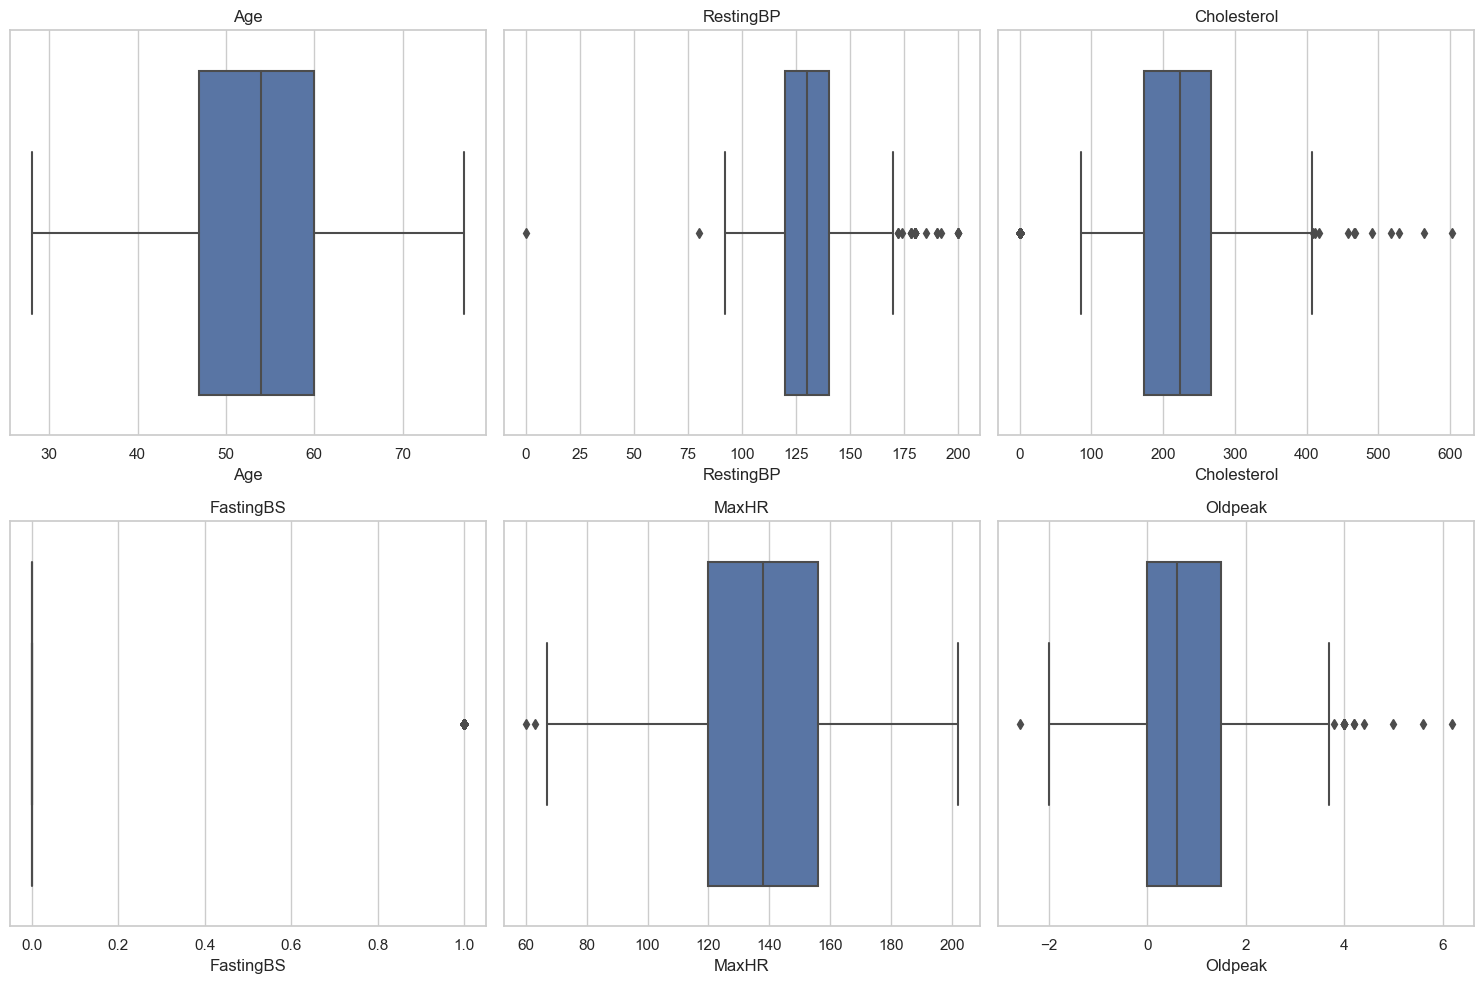

In [3]:

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with your DataFrame's name

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Specify the columns you want to plot
selected_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Loop through each selected column and create a boxplot
for i, column in enumerate(selected_columns):
    plt.subplot(2, 3, i+1)  # Adjust the subplot grid as needed
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

2. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3


In [4]:

# Specify the columns for which you want to remove outliers
columns_to_remove_outliers = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Loop through each selected column and calculate Z-scores
for column in columns_to_remove_outliers:
    z_scores = stats.zscore(df[column])
    
    # Identify outliers based on the Z-score threshold (e.g., 3 or -3)
    outliers = (z_scores > 3) | (z_scores < -3)
    
    # Remove outliers from the DataFrame
    df = df[~outliers]

# Display the updated DataFrame without outliers
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

3. Convert text columns to numbers using label encoding and one hot encoding


In [5]:
# Assuming your DataFrame is named 'df'
# If not, replace 'df' with your DataFrame's name

# Specify the categorical columns for which you want to create dummy variables
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope','ExerciseAngina']

# Use pd.get_dummies to create dummy variables for the specified columns
df = pd.get_dummies(df, columns=categorical_columns)

# Display the updated DataFrame with dummy variables
print(df)


     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0    False 

4. Apply scaling


In [6]:
# Select numeric columns for standardization
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the updated DataFrame with standardized numeric columns
print(df)


          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0   -1.428154   0.465900     0.849636          0  1.384320 -0.855469   
1   -0.475855   1.634714    -0.168122          0  0.752973  0.137516   
2   -1.745588  -0.118507     0.793612          0 -1.535661 -0.855469   
3   -0.581666   0.349019     0.149344          0 -1.141069  0.634008   
4    0.053200   1.050307    -0.028064          0 -0.588640 -0.855469   
..        ...        ...          ...        ...       ...       ...   
913 -0.899099  -1.287320     0.616205          0 -0.194048  0.336112   
914  1.534554   0.699663    -0.046738          1  0.161085  2.520678   
915  0.370633  -0.118507    -0.625646          0 -0.864854  0.336112   
916  0.370633  -0.118507     0.354763          0  1.463238 -0.855469   
917 -1.639776   0.349019    -0.214808          0  1.423779 -0.855469   

     HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0               0  False   True              False  ...  

5. Build a classification model using support vector machine. Use standalone model as well as Bagging model and check if you see any difference in the performance.


SVM model 

In [42]:
from sklearn.model_selection import train_test_split
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=10)

In [43]:
X_train.shape

(674, 20)

In [44]:
X_test.shape

(225, 20)

In [45]:

# Create an SVC model
svc_model = SVC()

svc_model.fit(X_train,y_train)
test_accuracy = svc_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)# Perform cross-validation and print individual scores
cv_scores = cross_val_score(svc_model, X, y, cv=5) 
# Adjust cv as needed
print("Individual Cross-Validation Scores:", cv_scores)

# Print the mean of the cross-validation scores
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)


Test Set Accuracy: 0.9111111111111111
Individual Cross-Validation Scores: [0.85       0.86666667 0.85       0.83333333 0.75418994]
Mean Cross-Validation Score: 0.8308379888268156


Bagging Model 

In [46]:
# Create a BaggingClassifier with an SVC base estimator
bag_model = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0  # Corrected typo in 'randome_state' to 'random_state'
)

# Fit the BaggingClassifier on the training data
bag_model.fit(X_train, y_train)

# Print the out-of-bag score
print("Out-of-Bag Score:", bag_model.oob_score_)

# Print the accuracy score on the test set
test_accuracy = bag_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

C:\Users\vanhu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Out-of-Bag Score: 0.8590504451038575
Test Set Accuracy: 0.9155555555555556


In [47]:
bag_model = BaggingClassifier(
    estimator=SVC(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)

# Use cross_val_score for BaggingClassifier
cv_scores = cross_val_score(bag_model, X, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.85       0.86111111 0.83888889 0.84444444 0.75977654]
Mean Cross-Validation Score: 0.8308441961514588


=> Accuracy Score and Mean Cross-validation Score of SVM +Baggin improve slightly compares to SVM only.

6. Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance


In [48]:

# Suppress the future warning for the name change
warnings.filterwarnings("ignore", category=FutureWarning)

# Create a standalone DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=0)

# Use cross_val_score for DecisionTreeClassifier
cv_scores_dt = cross_val_score(decision_tree_model, X, y, cv=5)

# Print cross-validation scores for standalone DecisionTreeClassifier
print("DecisionTreeClassifier Cross-Validation Scores:", cv_scores_dt)
print("Mean Cross-Validation Score:", cv_scores_dt.mean())

# Create a BaggingClassifier with DecisionTreeClassifier as the base estimator
bagging_model_dt = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=0),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)

# Use cross_val_score for BaggingClassifier with DecisionTreeClassifier
cv_scores_bagging_dt = cross_val_score(bagging_model_dt, X, y, cv=5)

# Print cross-validation scores for BaggingClassifier with DecisionTreeClassifier
print("\nBaggingClassifier with DecisionTreeClassifier Cross-Validation Scores:", cv_scores_bagging_dt)
print("Mean Cross-Validation Score:", cv_scores_bagging_dt.mean())


DecisionTreeClassifier Cross-Validation Scores: [0.8        0.81666667 0.79444444 0.73333333 0.63687151]
Mean Cross-Validation Score: 0.7562631905648665

BaggingClassifier with DecisionTreeClassifier Cross-Validation Scores: [0.90555556 0.81111111 0.83333333 0.80555556 0.74301676]
Mean Cross-Validation Score: 0.8197144630664186


7. Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why. Use internet to figure out in what conditions bagging works the best.


- The BaggingClassifier with DecisionTreeClassifier as the base estimator performed better than the standalone DecisionTreeClassifier. This improvement is consistent with the expected behavior of bagging, especially when dealing with complex models like decision trees.


- For SVM, the benefits of bagging may not be as pronounced because SVMs are already relatively stable and less prone to overfitting. However, in some cases, bagging can still provide improvements, particularly when dealing with noisy data or enhancing model robustness.